Refered from https://github.com/aditi-govindu/Image-Classsification-using-sklearn

In [3]:
#in case of pillow install instead of PIL
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

<h1>Data Preprocessing</h1>

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray

target = []
flat_data = []
images = []
DataDirectory = 'train'

# Images to be classified as:
Categories = ["lensed","unlensed"]

for i in Categories:
    print("Category is:",i,"\tLabel encoded as:",Categories.index(i))
    # Encode categories cute puppy as 0, icecream cone as 1 and red rose as 2
    target_class = Categories.index(i)
    # Create data path for all folders under MinorProject
    path = os.path.join(DataDirectory,i)
    # Image resizing, to ensure all images are of same dimensions
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
        # Skimage normalizes the value of image
        img_resized = resize(img_array,(150,150,3))
        flat_data.append(img_resized.flatten())
        images.append(img_resized)
        target.append(target_class)
# Convert list to numpy array format
flat_data = np.array(flat_data)
images = np.array(images)
target = np.array(target)

Category is: lensed 	Label encoded as: 0
Category is: unlensed 	Label encoded as: 1


In [5]:
df = pd.DataFrame(flat_data)
# Create a column for output data called Target
df['Target'] = target
# Rows are all the input images (90 images, 30 of each category)
df

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.067444,0.036532,0.021054,0.072107,0.037088,0.018695,0.072121,0.031556,0.022330,0.063456,...,0.027577,0.022954,0.015368,0.028850,0.024325,0.016858,0.032603,0.025301,0.016983,0
1,0.025879,0.033517,0.030210,0.024510,0.029584,0.033968,0.026091,0.030026,0.037871,0.028835,...,0.042757,0.035583,0.041267,0.125445,0.073786,0.078372,0.068892,0.050131,0.051497,0
2,0.073235,0.065040,0.068962,0.071824,0.063583,0.067504,0.073194,0.061631,0.065553,0.079837,...,0.092572,0.076396,0.069585,0.124763,0.092258,0.056325,0.521179,0.445267,0.178808,0
3,0.075385,0.055096,0.070650,0.071079,0.059996,0.072840,0.065576,0.059955,0.074130,0.066944,...,0.056597,0.060381,0.075890,0.061885,0.062579,0.077189,0.048749,0.067365,0.076878,0
4,0.065208,0.073052,0.061954,0.061001,0.069622,0.064191,0.058567,0.071902,0.067734,0.058050,...,0.060960,0.068425,0.058735,0.062506,0.068642,0.068360,0.067732,0.069340,0.067779,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,0.104749,0.104749,0.104749,0.076137,0.076137,0.076137,0.049302,0.049302,0.049302,0.137366,...,0.098294,0.099298,0.099882,0.112287,0.112995,0.113791,0.083141,0.083141,0.084291,1
273,0.062854,0.011874,0.047168,0.063072,0.012092,0.047386,0.064597,0.013617,0.048911,0.069390,...,0.082353,0.015686,0.047059,0.084314,0.017647,0.049020,0.085621,0.018954,0.050327,1
274,0.155447,0.155447,0.155447,0.121242,0.121242,0.121242,0.061765,0.062418,0.063725,0.029085,...,0.049129,0.049129,0.041285,0.056209,0.056209,0.048366,0.058824,0.058824,0.050980,1
275,0.062092,0.062092,0.062092,0.043791,0.043791,0.043791,0.013617,0.013617,0.013617,0.002723,...,0.004575,0.004575,0.004575,0.004575,0.004575,0.004575,0.004575,0.004575,0.004575,1


AxesImage(54,36;334.8x217.44)


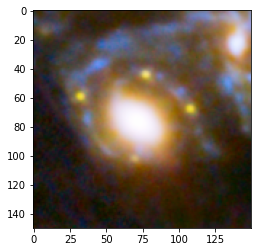

In [6]:
# Display 1 resized image 
print(plt.imshow(images[20]))

<h1>Split data into test-train</h1>

In [7]:
# Split data into input and output sets
from sklearn.model_selection import train_test_split

# x is all input values of images and their pixel values (90 images * 67500)
# y is output values or correct label of image (90 images * 1 column of labels)

x = df.iloc[:,:-1].values
y = target
print("Input data dimensions:",x.shape)
print("Output data dimensions:",y.shape)

# Stratify ensures every image is divided in equal proportions (no bias)
x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True,test_size = 0.3,random_state=109,stratify=y)
print("Dimensions of input training data:",x_train.shape)
print("Dimensions of input testing data:",x_test.shape)
print("Dimensions of output training data:",y_train.shape)
print("Dimensions of output testing data:",y_test.shape)

Input data dimensions: (277, 67500)
Output data dimensions: (277,)
Dimensions of input training data: (193, 67500)
Dimensions of input testing data: (84, 67500)
Dimensions of output training data: (193,)
Dimensions of output testing data: (84,)


<h1>Applying SVM</h1>

In [9]:
# Applying Support Vector Machine classifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]
                    
# Apply GridSearchCV to find best parameters for given dataset
# verbose is used to describe the steps taken to find best parameters
cv = GridSearchCV(SVC(), tuned_parameters, refit = True,verbose= 3) 
cv.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.769 total time=   2.7s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.744 total time=   2.6s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.590 total time=   2.5s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.684 total time=   2.7s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.632 total time=   2.8s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.795 total time=   2.4s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.718 total time=   2.4s
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.564 total time=   2.2s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.737 total time=   2.6s
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.684 total time=   2.5s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.718 total time=   2.8s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             verbose=3)

In [10]:
# Display parameters selected by GridSearchCV for SVM 3 classes
# Parameters obtained: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
print("Best parameters to apply are:",cv.best_params_)
# Display model after hyperparameter tuning
svm = cv.best_estimator_
print("Model after tuning is:\n",svm)

Best parameters to apply are: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Model after tuning is:
 SVC(C=10, gamma=0.0001)


In [11]:
# Predict the output of model after above parameters are applied to it
y_prediction = svm.predict(x_test)

<h1>Accuracy Analysis</h1>

In [22]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# print("\nClassification report of model:\n",classification_report(y_prediction,y_test))
print("Accuracy score:",100*accuracy_score(y_prediction,y_test),"%")

Accuracy score: 79.76190476190477 %


<h1>Saving Model</h1>

In [15]:
import pickle
# Save SVM model in pickle file
pickle.dump(svm,open("gravitational-lensing-model.p","wb"))

<h1>Testing saved model</h1>

In [16]:
# Read byte from pickle model
test_model = pickle.load(open("gravitational-lensing-model.p","rb"))

Enter url of image to test:  https://www.atnf.csiro.au/outreach//education/senior/astrophysics/images/stellarevolution/jewelboxmbsml.jpg


Dimensions of original image are: (267, 400, 3)
PREDICTED OUTPUT IS: unlensed


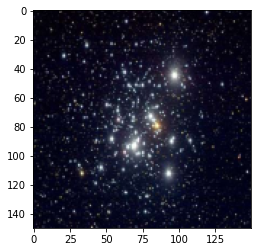

In [21]:
# Testing for a new image
flat_data = []
url = input ('Enter url of image to test: ')
img_array = imread(url)
# Resize image
img_resized = resize(img_array,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print("Dimensions of original image are:",img_array.shape)
plt.imshow(img_resized)
y_output = test_model.predict(flat_data)
y_output = Categories[y_output[0]]
# URLs to test:
#https://cdn.mos.cms.futurecdn.net/nGVgh7Nwid5HFgCgvs6cUJ.jpg
#https://www.atnf.csiro.au/outreach//education/senior/astrophysics/images/stellarevolution/jewelboxmbsml.jpg
print("PREDICTED OUTPUT IS:",y_output)